# Python Project: Movie Industry

Within this project, we briefly analyze the movie industry. During this analysis, we plan to gauge which films generate the most revenue, which companies were the highest/lowest grossing, as well as conducting correlation analysis to determine what variables play a significant role in increasing revenue.

Let's begin with importing the libraries we need for analysis!

In [2]:
#Importing Libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plots we will create

#Read in the data
df = pd.read_csv(r'C:\Users\a.f.smith\PythonWork\Datasets\movies.csv')

In [3]:
# Let's look at the data!

# Data types of our colums

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [4]:
#Taking a glimpse at the data
df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


Next, we must check the data for null or missing values to prevent data skewing

In [5]:
#Looking for missing data. 

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

#Displaying rows of films with null values
df[df['budget'].isna()]


name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
16,Fame,R,Drama,1980,"May 16, 1980 (United States)",6.6,21000.0,Alan Parker,Christopher Gore,Eddie Barth,United States,NaN,21202829.0,Metro-Goldwyn-Mayer (MGM),134.0
19,Stir Crazy,R,Comedy,1980,"December 12, 1980 (United States)",6.8,26000.0,Sidney Poitier,Bruce Jay Friedman,Gene Wilder,United States,NaN,101300000.0,Columbia Pictures,111.0
24,Urban Cowboy,PG,Drama,1980,"June 6, 1980 (United States)",6.4,14000.0,James Bridges,Aaron Latham,John Travolta,United States,NaN,46918287.0,Paramount Pictures,132.0
25,Altered States,R,Horror,1980,"December 25, 1980 (United States)",6.9,33000.0,Ken Russell,Paddy Chayefsky,William Hurt,United States,NaN,19853892.0,Warner Bros.,102.0
26,Little Darlings,R,Comedy,1980,"March 21, 1980 (United States)",6.5,5100.0,Ron Maxwell,Kimi Peck,Tatum O'Neal,United States,NaN,34326249.0,Stephen Friedman/Kings Road Productions,96.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7657,Leap,NaN,Drama,2020,"September 25, 2020 (United States)",6.7,903.0,Peter Ho-Sun Chan,Ji Zhang,Gong Li,China,NaN,25818882.0,NaN,135.0
7659,I Am Fear,Not Rated,Horror,2020,"March 3, 2020 (United States)",3.4,447.0,Kevin Shulman,Kevin Shulman,Kristina Klebe,United States,NaN,13266.0,Roxwell Films,87.0
7660,Aloha Surf Hotel,NaN,Comedy,2020,"November 5, 2020 (United States)",7.1,14.0,Stefan C. Schaefer,Stefan C. Schaefer,Augie Tulba,United States,NaN,NaN,Abominable Pictures,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0


In [6]:
df.mean()

year       2.000405e+03
score      6.390411e+00
votes      8.810850e+04
budget     3.558988e+07
gross      7.850054e+07
runtime    1.072616e+02
dtype: float64

As seen above, there are null values present within our dataset. Below is my plan for cleaning/standardizing the data before I conduct analysis. *Note* A small selection of films that did not contain enough data for their genre were specified a mean value of all movies created.

In [7]:
# Plan for Blank Values

# Score/Votes/Runtime = Average of all movies

# Budget/Gross: Average of movies within its specified genre

df['score'] = df['score'].fillna(df.groupby('genre')['score'].transform('mean'))
df['votes'] = df['votes'].fillna(df.groupby('genre')['votes'].transform('mean'))
df['runtime'] = df['runtime'].fillna(df.groupby('genre')['runtime'].transform('mean'))
df['budget'] = df['budget'].fillna(df.groupby('genre')['budget'].transform('mean'))
df['gross'] = df['gross'].fillna(df.groupby('genre')['gross'].transform('mean'))

df.at[474, 'gross'] = 7.817185e+07
df.at[162, 'budget'] = 3.391858e+07
df.at[7600, 'budget'] = 3.391858e+07
df.at[7613, 'budget'] = 3.391858e+07
df.at[7617, 'budget'] = 3.391858e+07



#Released/Writer/Star/Country = Researched values due to small nature of null values

#Company/Rating = None Listed for time purposes

#Writer: The Garden: Will Dixon, The Trip: None Listed, Legend of Deification: None Listed

#Star: The Business of Show Business: Tom Logan

#Released: Saw: The Final Chapter: October 29, 2010 (United States), The Wolfman: February 12, 2010 (United States)

#Country: Saw: The Final Chapter/The Wolfman/Clinton Road: United States


df.at[1820, 'writer'] = 'Will Dixon'
df.at[5834, 'writer'] = 'None Listed'
df.at[7655, 'writer'] = 'None Listed'
df.at[5728, 'released'] = 'October 29, 2010 (United States)'
df.at[5730, 'released'] = 'February 12, 2010 (United States)'
df.at[474, 'star'] = 'Tom Logan'
df.at[5728, 'country'] = 'United States'
df.at[5730, 'country'] = 'United States'
df.at[7615, 'country'] = 'United States'
df["company"].fillna("None Listed", inplace = True)
df["rating"].fillna("None Listed", inplace = True)


In [8]:
# Confirming there are no null values
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [9]:
#Drop potential duplicates

df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.400000,9.270000e+05,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,1.900000e+07,4.699877e+07,Warner Bros.,146.000000
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.800000,6.500000e+04,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4.500000e+06,5.885311e+07,Columbia Pictures,104.000000
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.700000,1.200000e+06,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,1.800000e+07,5.383751e+08,Lucasfilm,124.000000
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.700000,2.210000e+05,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3.500000e+06,8.345354e+07,Paramount Pictures,88.000000
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.300000,1.080000e+05,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6.000000e+06,3.984634e+07,Orion Pictures,98.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,None Listed,Drama,2020,"October 23, 2020 (United States)",3.100000,1.800000e+01,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7.000000e+03,3.893096e+07,None Listed,90.000000
7664,Dream Round,None Listed,Comedy,2020,"February 7, 2020 (United States)",4.700000,3.600000e+01,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,2.260780e+07,4.433187e+07,Cactus Blue Entertainment,90.000000
7665,Saving Mbango,None Listed,Drama,2020,"April 27, 2020 (Cameroon)",5.700000,2.900000e+01,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,5.875000e+04,3.893096e+07,Embi Productions,112.974934
7666,It's Just Us,None Listed,Drama,2020,"October 1, 2020 (United States)",6.693668,6.980354e+04,James Randall,James Randall,Christina Roz,United States,1.500000e+04,3.893096e+07,None Listed,120.000000


# Analysis Pt. 1: Querying Film Revenues

In the first section of my analysis, I will query the film dataset to determine what films to find commonalities within the data.

In [10]:
#Sort by top 16 highest grossing films
df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,2.370000e+08,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,3.560000e+08,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,2.000000e+08,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,2.450000e+08,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,3.210000e+08,2.048360e+09,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,"Love, Honor and Obey",R,Comedy,2000,"February 9, 2001 (United States)",6.5,5200.0,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,2.260780e+07,1.400000e+03,British Broadcasting Corporation (BBC),103.0
7625,The Untold Story,None Listed,Comedy,2019,"January 11, 2019 (United States)",5.7,320.0,Shane Stanley,Lee Stanley,Miko Hughes,United States,2.260780e+07,7.900000e+02,Visual Arts Entertainment,104.0
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020 (United States)",5.2,735.0,John Swab,John Swab,Ron Perlman,United States,2.236357e+07,6.820000e+02,Roxwell Films,93.0
2417,Madadayo,None Listed,Drama,1993,"April 17, 1993 (Japan)",7.3,5100.0,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,1.190000e+07,5.960000e+02,DENTSU Music And Entertainment,134.0


In [22]:
#Sort by top 16 lowest grossing films
df.sort_values(by=['gross'], inplace=False, ascending=True)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
3203,Trojan War,PG-13,Comedy,1997,"October 1, 1997 (Brazil)",5.7,5800.0,George Huang,Andy Burg,Will Friedle,United States,1.500000e+07,3.090000e+02,Daybreak,85.0
2417,Madadayo,None Listed,Drama,1993,"April 17, 1993 (Japan)",7.3,5100.0,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,1.190000e+07,5.960000e+02,DENTSU Music And Entertainment,134.0
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020 (United States)",5.2,735.0,John Swab,John Swab,Ron Perlman,United States,2.236357e+07,6.820000e+02,Roxwell Films,93.0
7625,The Untold Story,None Listed,Comedy,2019,"January 11, 2019 (United States)",5.7,320.0,Shane Stanley,Lee Stanley,Miko Hughes,United States,2.260780e+07,7.900000e+02,Visual Arts Entertainment,104.0
3818,"Love, Honor and Obey",R,Comedy,2000,"February 9, 2001 (United States)",6.5,5200.0,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,2.260780e+07,1.400000e+03,British Broadcasting Corporation (BBC),103.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,3.210000e+08,2.048360e+09,Marvel Studios,149.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,2.450000e+08,2.069522e+09,Lucasfilm,138.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,2.000000e+08,2.201647e+09,Twentieth Century Fox,194.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,3.560000e+08,2.797501e+09,Marvel Studios,181.0


From looking at the data, what catches my eye is the count of votes and budgets for higher grossing films. 

# Correlation Analysis
I will begin my second section of analysis by performing correlation analysis. I believe that factors such as the amount invested in the budget should be a significant predictor of gross revenue.

In [13]:
df.corr(method='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.098033,0.222831,0.277925,0.252400,0.120918
score,0.098033,1.000000,0.409155,0.058193,0.182604,0.399295
votes,0.222831,0.409155,1.000000,0.430875,0.629063,0.309076
budget,0.277925,0.058193,0.430875,1.000000,0.715764,0.258235
gross,0.252400,0.182604,0.629063,0.715764,1.000000,0.241493
runtime,0.120918,0.399295,0.309076,0.258235,0.241493,1.000000


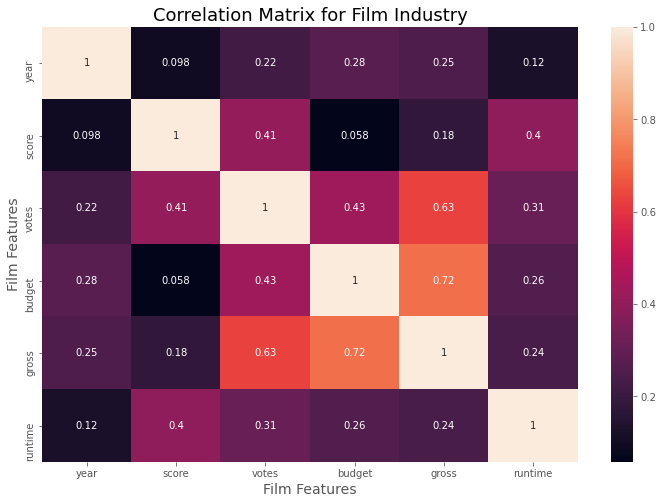

In [19]:
# Creating a heat map to offer a clearer view of the correlations present
correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Film Industry', fontsize=18)

plt.xlabel('Film Features',fontsize=14)

plt.ylabel('Film Features',fontsize=14)
plt.show()

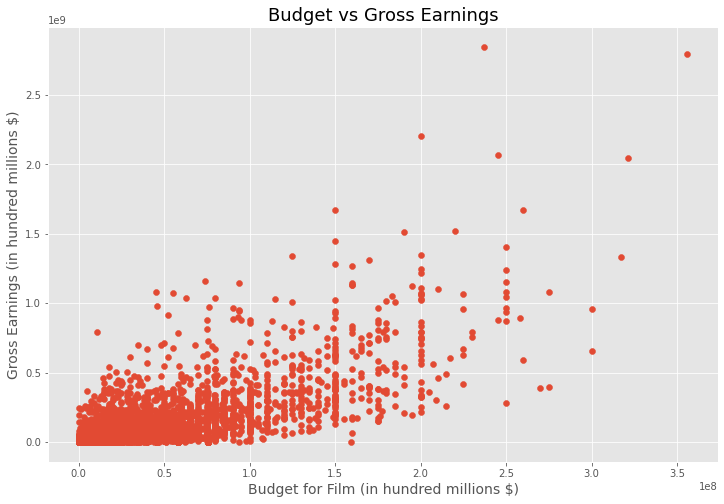

In [15]:
#Building scatterplot with Budget and Gross Revenue

plt.scatter(x = df['budget'], y = df['gross'])

plt.title('Budget vs Gross Earnings', fontsize=18)

plt.xlabel('Budget for Film (in hundred millions $)',fontsize=14)

plt.ylabel('Gross Earnings (in hundred millions $)',fontsize=14)
plt.show()

Text(0, 0.5, 'Gross Earnings (in hundred millions $)')

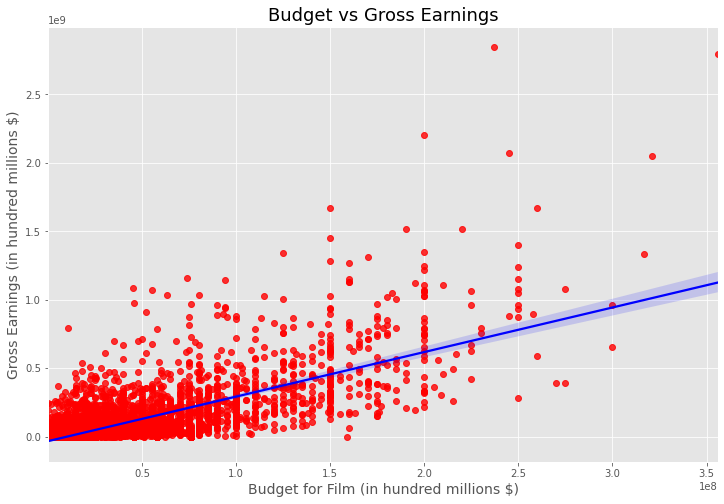

In [20]:
#Create regression plot for Budget vs Gross Earnings using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color":"blue"})
plt.title('Budget vs Gross Earnings', fontsize=18)

plt.xlabel('Budget for Film (in hundred millions $)',fontsize=14)

plt.ylabel('Gross Earnings (in hundred millions $)',fontsize=14)

Text(0, 0.5, 'Gross Earnings (in hundred millions $)')

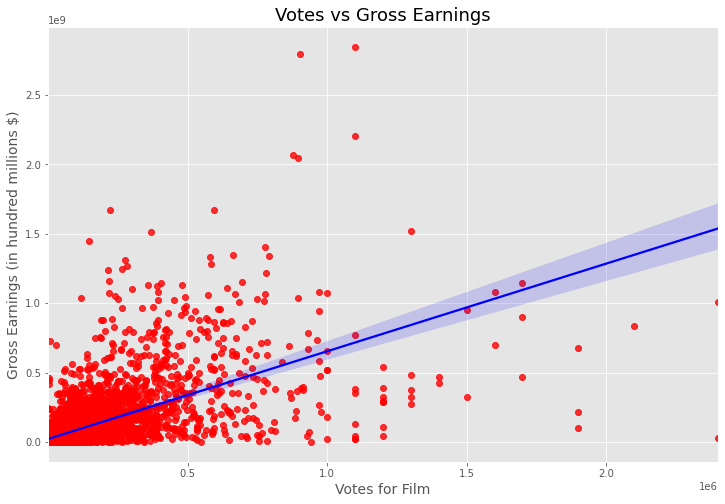

In [21]:
#Creating regression plot to analyze relationship between Votes & Gross Earnings
sns.regplot(x='votes', y='gross', data=df, scatter_kws={"color": "red"},
            line_kws={"color":"blue"})
plt.title('Votes vs Gross Earnings', fontsize=18)

plt.xlabel('Votes for Film',fontsize=14)

plt.ylabel('Gross Earnings (in hundred millions $)',fontsize=14)

In [18]:
# Saving file for Tableau manipulation
df.to_csv('movieindustry.csv')